# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

## Overview

In [3]:
#Check the dataset size

print(data.shape)

(32561, 15)


In [4]:
#Check data types

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
#Analyze the statistics of numerical variables

print(data.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


## Handle missing values

In [6]:
#Check for missing values in each column

print(data.isnull().sum())

#Some datasets use "?" or "unknown" instead of actual missing values

print(data.replace("?", None).isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [7]:
#Replace "?" with NaN
data.replace("?", np.nan, inplace=True)
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [8]:
#Replace missing values with the most frequent value (mode)

for col in ["workclass", "occupation", "native-country"]:
    data[col] = data[col].fillna(data[col].mode()[0])


print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Encode data

In [9]:
#Label encoding for binary variables

label_encoder_sex = LabelEncoder()
data['sex'] = label_encoder_sex.fit_transform(data['sex'])

label_encoder_income = LabelEncoder()
data['income'] = label_encoder_income.fit_transform(data['income'])

#One-Hot Encoding for categorical variables

categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True) 

#Check the first rows

print(data.head())

   age  fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0   39   77516  Bachelors             13    1          2174             0   
1   50   83311  Bachelors             13    1             0             0   
2   38  215646    HS-grad              9    1             0             0   
3   53  234721       11th              7    1             0             0   
4   28  338409  Bachelors             13    0             0             0   

   hours-per-week  income  workclass_Local-gov  ...  native-country_Portugal  \
0              40       0                False  ...                    False   
1              13       0                False  ...                    False   
2              40       0                False  ...                    False   
3              40       0                False  ...                    False   
4              40       0                False  ...                    False   

   native-country_Puerto-Rico  native-country_Scotland  

In [10]:
#Check for missing values
print(data.isnull().sum())


age                               0
fnlwgt                            0
education                         0
education-num                     0
sex                               0
                                 ..
native-country_Thailand           0
native-country_Trinadad&Tobago    0
native-country_United-States      0
native-country_Vietnam            0
native-country_Yugoslavia         0
Length: 84, dtype: int64


## Correct errors, inconsistencies, remove duplicates if any

In [11]:
#Check for duplicates

duplicate_count = data.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")


Number of duplicates: 24


In [12]:
#Remove duplicates

data = data.drop_duplicates()

In [13]:
#Check again

print(f"Number of duplicates after removal: {data.duplicated().sum()}")

Number of duplicates after removal: 0


In [14]:
print("Data types before conversion:\n", data.dtypes)

Data types before conversion:
 age                                int64
fnlwgt                             int64
education                         object
education-num                      int64
sex                                int64
                                   ...  
native-country_Thailand             bool
native-country_Trinadad&Tobago      bool
native-country_United-States        bool
native-country_Vietnam              bool
native-country_Yugoslavia           bool
Length: 84, dtype: object


In [15]:
#Verify if boolean columns contain only True or False values
for col in data.select_dtypes(include='bool').columns:
    print(f"{col}: {data[col].unique()}")


workclass_Local-gov: [False  True]
workclass_Never-worked: [False  True]
workclass_Private: [False  True]
workclass_Self-emp-inc: [False  True]
workclass_Self-emp-not-inc: [False  True]
workclass_State-gov: [ True False]
workclass_Without-pay: [False  True]
marital-status_Married-AF-spouse: [False  True]
marital-status_Married-civ-spouse: [False  True]
marital-status_Married-spouse-absent: [False  True]
marital-status_Never-married: [ True False]
marital-status_Separated: [False  True]
marital-status_Widowed: [False  True]
occupation_Armed-Forces: [False  True]
occupation_Craft-repair: [False  True]
occupation_Exec-managerial: [False  True]
occupation_Farming-fishing: [False  True]
occupation_Handlers-cleaners: [False  True]
occupation_Machine-op-inspct: [False  True]
occupation_Other-service: [False  True]
occupation_Priv-house-serv: [False  True]
occupation_Prof-specialty: [False  True]
occupation_Protective-serv: [False  True]
occupation_Sales: [False  True]
occupation_Tech-support:

## Outlier detection and treatment if any

In [16]:
print(data.describe())

                age        fnlwgt  education-num           sex  capital-gain  \
count  32537.000000  3.253700e+04   32537.000000  32537.000000  32537.000000   
mean      38.585549  1.897808e+05      10.081815      0.669238   1078.443741   
std       13.637984  1.055565e+05       2.571633      0.470495   7387.957424   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      1.000000      0.000000   
75%       48.000000  2.369930e+05      12.000000      1.000000      0.000000   
max       90.000000  1.484705e+06      16.000000      1.000000  99999.000000   

       capital-loss  hours-per-week        income  
count  32537.000000    32537.000000  32537.000000  
mean      87.368227       40.440329      0.240926  
std      403.101833       12.346889      0.427652  
min        0.000000        1.000000      0.000000  
25%        0.000000

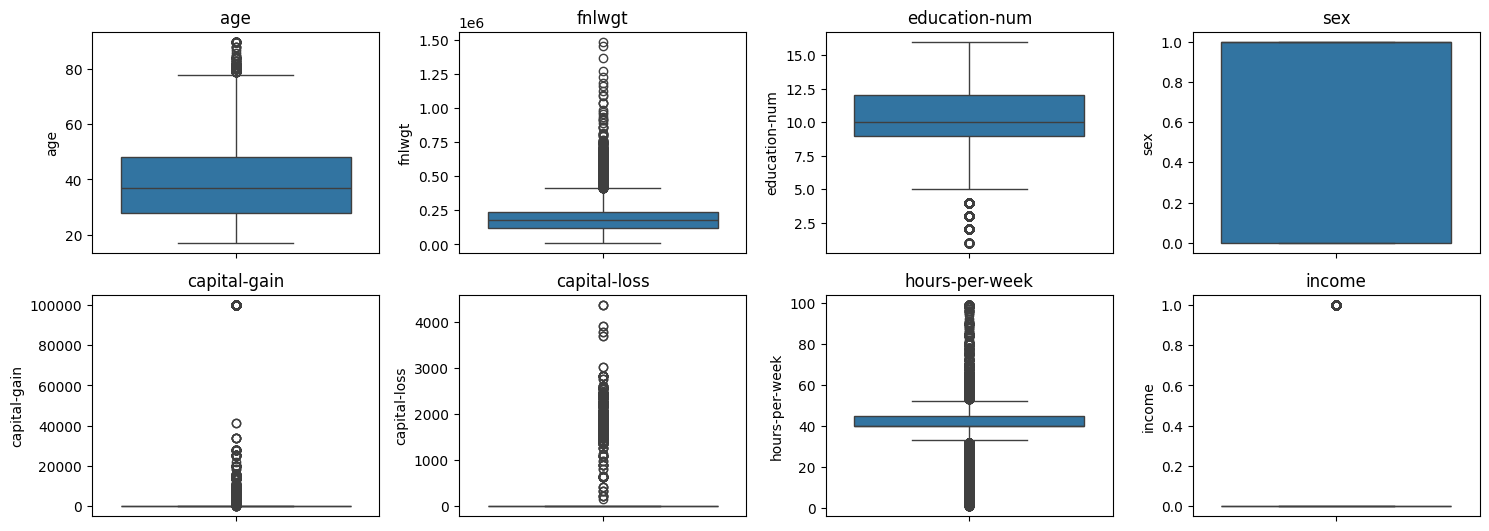

In [17]:
#Select numerical columns

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

#Generate boxplots for each numeric column

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [18]:
#Define percentiles to analyze
percentiles = [95, 97, 98, 99]

#Compute percentile thresholds for each relevant column
percentile_values = {
    "capital-gain": {p: np.percentile(data["capital-gain"], p) for p in percentiles},
    "capital-loss": {p: np.percentile(data["capital-loss"], p) for p in percentiles},
    "hours-per-week": {p: np.percentile(data["hours-per-week"], p) for p in percentiles},
}

#Convert results into a DataFrame for visualization
df_percentiles = pd.DataFrame(percentile_values)

print(df_percentiles)

    capital-gain  capital-loss  hours-per-week
95        5013.0           0.0            60.0
97        7688.0        1848.0            65.0
98       14084.0        1902.0            70.0
99       15024.0        1980.0            80.0


In [19]:
#Count the number of cases where 'capital-gain' exceeds 15,000

high_capital_gain_count = data[data['capital-gain'] > 15000].shape[0]

print(high_capital_gain_count)

613


In [20]:
#Count the number of instances where 'capital-loss' exceeds 2,000

high_capital_loss_count = data[data['capital-loss'] > 2000].shape[0]

print(high_capital_loss_count)

325


In [21]:
print(data.shape)

(32537, 84)


In [22]:
#Winsonorisation to reduce the influence of outliers in capital-gain, capital-loss and hours-per-week
data['capital-gain'] = data['capital-gain'].apply(lambda x: min(x, 15000))
data['capital-loss'] = data['capital-loss'].apply(lambda x: min(x, 2000))
data['hours-per-week'] = data['hours-per-week'].apply(lambda x: min(x, 80))

After extensive testing, I explored multiple winsorization techniques to reduce the influence of outliers in capital-gain, capital-loss and hours-per-week. The approaches included:

1. Direct winsorization with scipy.stats.mstats.winsorize() applying a 2% cap at each tail
2. A loop-based winsorization approach using np.percentile() to compute dynamic thresholds.
3. Fixed-value capping based on the 99th percentile.

Despite implementing multiple debugging measures, such as:

- checking for NaN values before and after winsorization to ensure data integrity.
- verifying percentile-based limits to confirm appropriate thresholds.
- ensuring correct conversion of winsorize() output to Pandas Series as it returns a MaskedArray by default.
- comparing results between direct application and loop-based implementation.

... both direct winsorize() application (2% at each tail) and the loop-based method led to an empty DataFrame suggesting that either NaN values were introduced, all values were modified incorrectly or extreme data loss occurred.

The only stable approach that did not cause errors or data loss was fixed-value capping where the upper limits were set based on the 99th percentile. Using the 99th percentile for winsorization is optimal because it effectively removes only the most extreme 1% of outliers while preserving the integrity of the dataset. Unlike arbitrary thresholds, the 99th percentile is data-driven, ensuring that only values significantly deviating from the normal distribution are capped. It strikes a balance between outlier control and data retention.

In [23]:
print(data.shape)

(32537, 84)


In [24]:
#Check again the number of cases where 'capital-gain' exceeds 15,000

high_capital_gain_count = data[data['capital-gain'] > 15000].shape[0]

print(high_capital_gain_count)

0


In [25]:
#Check again the number of instances where 'capital-loss' exceeds 2,000

high_capital_loss_count = data[data['capital-loss'] > 2000].shape[0]

print(high_capital_loss_count)

0


In [26]:
#Identify individuals who report working only 1 hour per week to check for anomalies

one_hour_workers = data[data['hours-per-week'] == 1]

#Display the filtered rows
print(one_hour_workers)

       age  fnlwgt     education  education-num  sex  capital-gain  \
189     58  109567     Doctorate             16    1             0   
1036    66  150726           9th              5    1          1409   
1262    69  195779     Assoc-voc             11    0             0   
5590    78  363134       HS-grad              9    0             0   
5632    45  189564       Masters             14    0             0   
5766    62   97231  Some-college             10    0             0   
5808    76  211574          10th              6    1             0   
8447    67  244122     Assoc-voc             11    0             0   
9147    75  260543          10th              6    0             0   
11451   27  147951       HS-grad              9    1             0   
19337   72   76860       HS-grad              9    1             0   
19750   23   72887       HS-grad              9    1             0   
20072   65   76043       HS-grad              9    1             0   
20909   77   71676  

In [27]:
print(data.shape)

(32537, 84)


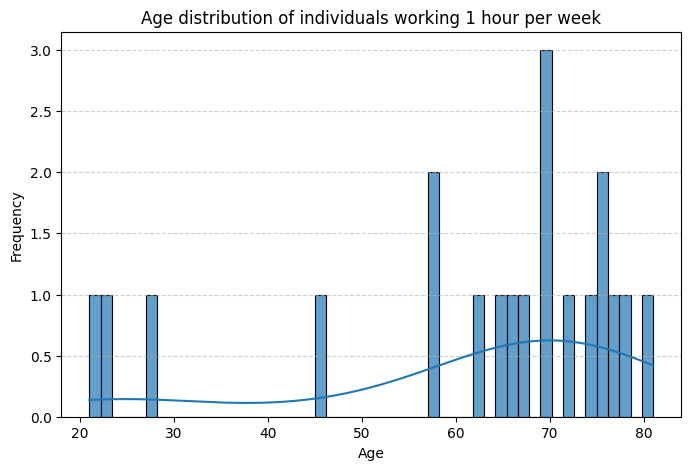

In [28]:
#Plot the age distribution of individuals working only 1 hour per week

plt.figure(figsize=(8, 5))
sns.histplot(one_hour_workers['age'], bins=50, edgecolor='black', alpha=0.7, kde=True)
plt.title('Age distribution of individuals working 1 hour per week')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

##### The spike in the 60+ age group suggests that these individuals are likely retired but still engaging in occasional work. This pattern aligns with real-world trends where some retirees: work part-time for supplemental income, take on consulting or freelance work, stay active in the workforce for personal or social reasons etc. So, these individuals represent a valid subset of the workforce rather than anomalies.

In [29]:
#Identify individuals working close to the maximum limit of 99 hours
extreme_hours_workers = data[data['hours-per-week'] >= 80]

# Display the filtered data
print(extreme_hours_workers)


       age  fnlwgt     education  education-num  sex  capital-gain  \
10      37  280464  Some-college             10    1             0   
28      39  367260       HS-grad              9    1             0   
272     50   30653       Masters             14    1          2407   
299     38  169469       HS-grad              9    1             0   
520     38   99146     Bachelors             13    1         15000   
...    ...     ...           ...            ...  ...           ...   
32391   55  199763       HS-grad              9    1             0   
32402   42  288154  Some-college             10    1             0   
32469   58  181974     Doctorate             16    0             0   
32476   35   30673          12th              8    1             0   
32531   30   33811     Bachelors             13    0             0   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
10                0              80       1                False  ...   
28           

#### 99 hours per week is unrealistically high for a standard full-time job, but may be valid for certain professions (business owners, medical professionals, gig workers or highly demanding roles). The presence of multiple individuals in this range suggests that it isn't a data entry error but rather an extreme case.

In [30]:
#Compare with other feature

workclass_columns = [col for col in extreme_hours_workers.columns if 'workclass' in col]
print(workclass_columns)

extreme_hours_workers[workclass_columns].sum()

['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay']


workclass_Local-gov            16
workclass_Never-worked          0
workclass_Private             184
workclass_Self-emp-inc         38
workclass_Self-emp-not-inc     90
workclass_State-gov             8
workclass_Without-pay           0
dtype: int64

The majority of individuals working 80+ hours per week are in the private sector (184 cases), followed by self-employed workers. This aligns with expectations as self-employed individuals and private-sector workers often have more variable and long working hours. Government employees are less likely to work extreme hours, likely due to stricter labor policies. 

## Normalization / Standardization if necesarry

In [31]:
#Normalize the numerical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## Feature engineering

In [32]:
# Create capital balance ratio
data['capital_balance'] = data['capital-gain'] - data['capital-loss']

# Create a ratio feature to normalize the values
data['capital_gain_loss_ratio'] = (data['capital-gain'] + 1) / (data['capital-loss'] + 1)

print(data[['capital-gain', 'capital-loss', 'capital_balance', 'capital_gain_loss_ratio']].head())


   capital-gain  capital-loss  capital_balance  capital_gain_loss_ratio
0      0.611335     -0.218867         0.830202                 2.062817
1     -0.251583     -0.218867        -0.032716                 0.958118
2     -0.251583     -0.218867        -0.032716                 0.958118
3     -0.251583     -0.218867        -0.032716                 0.958118
4     -0.251583     -0.218867        -0.032716                 0.958118


In [33]:
#Create a binary flag for extreme working hours
data['high_hour_worker'] = (data['hours-per-week'] >= 80).astype(int)

#Create a binary flag for part-time workers
data['part_time_worker'] = (data['hours-per-week'] <= 20).astype(int)

print(data[['hours-per-week', 'high_hour_worker', 'part_time_worker']].head())


   hours-per-week  high_hour_worker  part_time_worker
0       -0.029928                 0                 1
1       -2.273618                 0                 1
2       -0.029928                 0                 1
3       -0.029928                 0                 1
4       -0.029928                 0                 1


In [34]:
#Create a feature for work experience

#Estimate work experience (assume schooling starts at 7 years old)
data['experience_years'] = data['age'] - data['education-num'] - 7

#Ensure no negative values
data['experience_years'] = data['experience_years'].apply(lambda x: max(x, 0))

print(data[['age', 'education-num', 'experience_years']].head())

        age  education-num  experience_years
0  0.030390       1.134777                 0
1  0.836973       1.134777                 0
2 -0.042936      -0.420679                 0
3  1.056950      -1.198407                 0
4 -0.776193       1.134777                 0


In [273]:
#Save the preprocessed dataset

data.to_csv("data_task1.csv", index=False)